{'Orange_Ripe': 54, 'Banana_Ripe': 86, 'Mango_Raw': 72, 'Leeche_Raw': 37, 'Mango_Ripe': 46, 'Papaya_Ripe': 77, 'Guava_Ripe': 56, 'Apple_Ripe': 81, 'Pomengranate_Ripe': 57, 'Guava_Raw': 45, 'Strawberry_Raw': 65, 'Apple_Raw': 78, 'Leeche_Ripe': 55, 'Papaya_Raw': 51, 'Strawberry_Ripe': 75, 'Pomengranate_Raw': 58, 'Coconut_Ripe': 58, 'Banana_Raw': 63, 'Coconut_Raw': 54, 'Orange_Raw': 48}
Average number of samples per class: 60.8


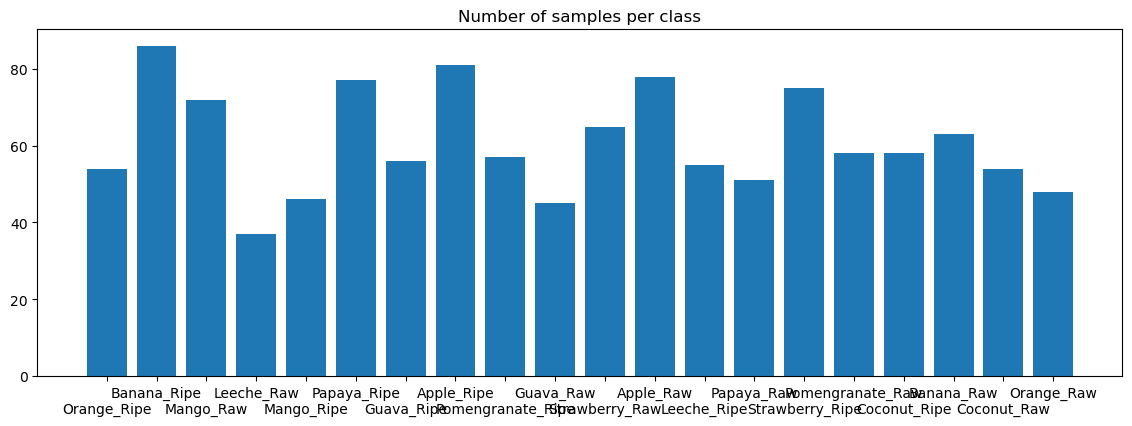

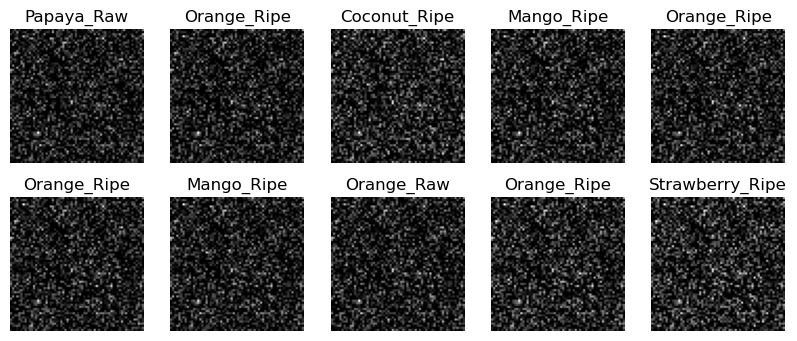

Number of Outliers: 13


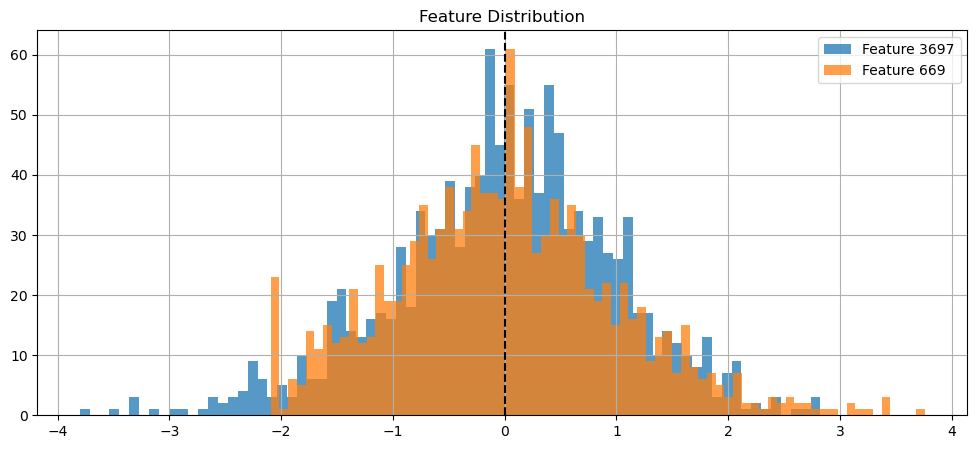

In [1]:
import data
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import LocalOutlierFactor as LOF
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import matplotlib.pyplot as plt

train_data = data.Dataset("train.csv")
train_data.x.shape

labels = train_data.get_cat_to_label()
counts = [train_data.y[train_data.y == i].shape[0] for i in labels]

print(dict(zip(labels.values(), counts)))
print("Average number of samples per class:", np.mean(counts))

plt.figure(figsize=(14, 4.5))
plt.bar([value if i%2 else f"\n{value}" for i, value in labels.items()], counts)
plt.title("Number of samples per class")
plt.show()

# Select 10 random indices
indices = np.random.choice(len(train_data.x), size=10, replace=False)
labels = train_data.get_cat_to_label()

# Sanity Check: Plot the images and their labels
plot = plt.figure(figsize=(10, 4))
for i, index in enumerate(indices):
    plt.subplot(2, 5, i+1)
    plt.imshow(train_data.x[index].reshape(64, 64), cmap="gray")
    plt.title(labels[train_data.y[index]])
    plt.axis("off")
plt.show()

lof = LOF(n_neighbors=10, contamination=0.01)
outlier_labels = lof.fit_predict(train_data.x)

print("Number of Outliers:", np.sum(outlier_labels == -1))

train_data.x = train_data.x[outlier_labels == 1]
train_data.y = train_data.y[outlier_labels == 1]

scaler = StandardScaler()
train_data.x = scaler.fit_transform(train_data.x)

f1, f2 = np.random.randint(0, 4096, size=2)

plt.figure(figsize=(12, 5))
plt.hist(train_data.x[:, f1], bins=75, alpha=0.75, label=f"Feature {f1}")
plt.hist(train_data.x[:, f2], bins=75, alpha=0.75, label=f"Feature {f2}")
plt.axvline(x=0, color="black", linestyle="--")

plt.title("Feature Distribution")
plt.legend()
plt.grid(True)
plt.show()

x_train, x_test, y_train, y_test = train_test_split(train_data.x, train_data.y, test_size=0.20)


## Decision Tree Classifier

In [2]:

import data
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import LocalOutlierFactor as LOF
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

decision_tree_classifier = DecisionTreeClassifier()
decision_tree_classifier.fit(x_train, y_train)

# Evaluate the Decision Tree classifier
decision_tree_accuracy = decision_tree_classifier.score(x_test, y_test)
print("Decision Tree Classifier Test Accuracy:", decision_tree_accuracy)


Decision Tree Classifier Test Accuracy: 0.3983402489626556


## Using Random forest

In [3]:
from sklearn.ensemble import RandomForestClassifier  # Added import for Random Forest Classifier
import matplotlib.pyplot as plt

# Assuming the rest of your code remains the same up to this point...

# Create and train the Random Forest Classifier
random_forest_classifier = RandomForestClassifier()
random_forest_classifier.fit(x_train, y_train)

# Evaluate the Random Forest Classifier
random_forest_accuracy = random_forest_classifier.score(x_test, y_test)
print("Random Forest Classifier Test Accuracy:", random_forest_accuracy)

Random Forest Classifier Test Accuracy: 0.6721991701244814


## Naive Bayes Classifier 

In [4]:
from sklearn.naive_bayes import GaussianNB  # Added import for Naive Bayes
import matplotlib.pyplot as plt

# Assuming the rest of your code remains the same up to this point...

# Create and train the Naive Bayes Classifier
naive_bayes_classifier = GaussianNB()
naive_bayes_classifier.fit(x_train, y_train)

# Evaluate the Naive Bayes Classifier
naive_bayes_accuracy = naive_bayes_classifier.score(x_test, y_test)
print("Naive Bayes Classifier Test Accuracy:", naive_bayes_accuracy)

Naive Bayes Classifier Test Accuracy: 0.4190871369294606


## LDA and PCA

In [5]:
# Define and train the Linear Discriminant Analysis (LDA) model
lda = LDA()
x_train_lda = lda.fit_transform(x_train, y_train)
x_test_lda = lda.transform(x_test)

# Define and train the Principal Component Analysis (PCA) model
pca = PCA(n_components=0.95)  # Retain 95% of variance
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

# Train the classifiers on the transformed data
logistic_regression = LogisticRegression()
decision_tree_classifier = DecisionTreeClassifier()
random_forest_classifier = RandomForestClassifier()
naive_bayes_classifier = GaussianNB()

# Fit the models
logistic_regression.fit(x_train_lda, y_train)
decision_tree_classifier.fit(x_train_pca, y_train)
random_forest_classifier.fit(x_train_pca, y_train)
naive_bayes_classifier.fit(x_train_pca, y_train)

# Evaluate the models
lda_accuracy = logistic_regression.score(x_test_lda, y_test)
pca_decision_tree_accuracy = decision_tree_classifier.score(x_test_pca, y_test)
pca_random_forest_accuracy = random_forest_classifier.score(x_test_pca, y_test)
pca_naive_bayes_accuracy = naive_bayes_classifier.score(x_test_pca, y_test)

print("LDA Test Accuracy:", lda_accuracy)
print("PCA Decision Tree Test Accuracy:", pca_decision_tree_accuracy)
print("PCA Random Forest Test Accuracy:", pca_random_forest_accuracy)
print("PCA Naive Bayes Test Accuracy:", pca_naive_bayes_accuracy)

/Users/nirmalsoni/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LDA Test Accuracy: 0.36099585062240663
PCA Decision Tree Test Accuracy: 0.34439834024896265
PCA Random Forest Test Accuracy: 0.5767634854771784
PCA Naive Bayes Test Accuracy: 0.3817427385892116


## KNN and training the final classifier|


In [6]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import matplotlib.pyplot as plt

# Add KNN to the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

# Optionally, perform grid search for hyperparameter tuning
param_grid = {
    'knn__n_neighbors': [3, 5, 7], # example values, adjust as needed
    'knn__weights': ['uniform', 'distance'] # example values, adjust as needed
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5)
grid_search.fit(x_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Evaluate on test set
test_score = grid_search.score(x_test, y_test)
print("Test set score:", test_score)


Best parameters: {'knn__n_neighbors': 7, 'knn__weights': 'distance'}
Best cross-validation score: 0.6059801381692573
Test set score: 0.5975103734439834


## Prediction on the test dataset 

In [7]:
# Load the test dataset
test_data = data.Dataset("test.csv")

# Preprocess the test data using the pre-fitted scaler
x_test_scaled = scaler.transform(test_data.x)

# Ensure that the test data has the same number of features as the training data after preprocessing
x_test_final = pca.transform(x_test_scaled)  # Assuming 'pca' is the PCA object fitted on training data

# Make predictions using the Random Forest Classifier
random_forest_predictions = random_forest_classifier.predict(x_test_final)

# Make predictions using the Decision Tree Classifier
decision_tree_predictions = decision_tree_classifier.predict(x_test_final)

# Write predictions to CSV file
data.write_to_csv("submission_random_forest.csv", random_forest_predictions, train_data.get_cat_to_label())
data.write_to_csv("submission_decision_tree.csv", decision_tree_predictions, train_data.get_cat_to_label())


## Final Accuracy

Final accuracy was coming out  0.5975103734439834